# PW SKILLS

## Assignment Questions

### Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.
### Answer : 

Min-Max scaling is a data preprocessing technique used to scale and normalize the features of a dataset within a specific range. The goal is to transform the values of the features into a common scale, typically between 0 and 1. This is achieved by applying the following formula to each feature:

�
scaled
=
�
−
�
min
�
max
−
�
min
X 
scaled
​
 = 
X 
max
​
 −X 
min
​
 
X−X 
min
​
 
​
 

Where:

�
scaled
X 
scaled
​
  is the scaled/normalized value of the feature.
�
X is the original value of the feature.
�
min
X 
min
​
  is the minimum value of the feature in the dataset.
�
max
X 
max
​
  is the maximum value of the feature in the dataset.
Min-Max scaling is particularly useful when working with algorithms that are sensitive to the scale of the input features, such as support vector machines, k-nearest neighbors, and neural networks.

Here's an example in Python using the scikit-learn library:

In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Sample dataset
data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

print("Original Data:\n", data)
print("\nScaled/Normalized Data:\n", scaled_data)


Original Data:
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

Scaled/Normalized Data:
 [[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


In this example, the MinMaxScaler scales each feature independently, ensuring that each feature's values are transformed into the range [0, 1] based on the minimum and maximum values of that feature in the original dataset.

### Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.
### Answer : 

The Unit Vector technique, also known as Unit Length or Vector Normalization, is a feature scaling method that scales each data point in a dataset such that the resulting vector has a Euclidean norm (length) of 1. This technique is particularly useful when the direction of the data points is more important than their magnitudes. The formula for unit vector scaling is:

�
unit
=
�
∥
�
∥
X 
unit
​
 = 
∥X∥
X
​
 

Where:

�
unit
X 
unit
​
  is the unit-scaled vector.
�
X is the original vector.
∥
�
∥
∥X∥ is the Euclidean norm of the vector 
�
X.
In contrast, Min-Max scaling (as described in the previous answer) scales each feature independently within a specific range, typically [0, 1].

Here's an example in Python using NumPy to illustrate Unit Vector scaling:

In [2]:
import numpy as np

# Sample dataset
data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

# Calculate the Euclidean norm of each row
norms = np.linalg.norm(data, axis=1, keepdims=True)

# Unit Vector scaling
unit_scaled_data = data / norms

print("Original Data:\n", data)
print("\nUnit Scaled Data:\n", unit_scaled_data)


Original Data:
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

Unit Scaled Data:
 [[0.26726124 0.53452248 0.80178373]
 [0.45584231 0.56980288 0.68376346]
 [0.50257071 0.57436653 0.64616234]]


In this example, each row of the original dataset is scaled to have a Euclidean norm of 1. The resulting vectors point in the same direction as the original vectors, but their lengths are normalized. This type of scaling can be useful in situations where the magnitude of the vectors is not as important as their orientation or relative proportions.

### Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.
### Answer : 

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional form while retaining as much variance as possible. The main idea behind PCA is to identify the principal components, which are the directions along which the data varies the most.

The steps involved in PCA are as follows:

Standardize the data: Subtract the mean from each feature and scale them to have a standard deviation of 1.

Compute the covariance matrix: Calculate the covariance matrix of the standardized data.

Compute eigenvectors and eigenvalues: Find the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the principal components, and the eigenvalues indicate the amount of variance captured by each principal component.

Sort eigenvectors by eigenvalues: Sort the eigenvectors in descending order based on their corresponding eigenvalues.

Select top k eigenvectors: Choose the top k eigenvectors to form a new matrix. This reduces the dimensionality of the data from the original number of features to k.

Project the data onto the new subspace: Multiply the standardized data by the selected eigenvectors to obtain the lower-dimensional representation of the original data.

Here's a simple example in Python using the scikit-learn library:

In [3]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
X_standardized = (X - X.mean(axis=0)) / X.std(axis=0)

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame for visualization
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Target'] = y

# Display the reduced-dimensional data
print(df_pca.head())


   Principal Component 1  Principal Component 2  Target
0              -2.264703               0.480027       0
1              -2.080961              -0.674134       0
2              -2.364229              -0.341908       0
3              -2.299384              -0.597395       0
4              -2.389842               0.646835       0


In this example, PCA is applied to the Iris dataset to reduce its dimensionality from 4 features to 2 principal components. The resulting DataFrame, df_pca, contains the transformed data with two new features capturing the most significant information from the original dataset. This reduced representation is useful for visualization, analysis, and potentially improving the efficiency of machine learning algorithms by working with a smaller set of features.

### Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.
### Answer : 

PCA (Principal Component Analysis) is a technique commonly used for feature extraction. In the context of PCA, feature extraction refers to the process of transforming the original features of a dataset into a new set of features, known as principal components, that capture the most important information in the data. These principal components are linear combinations of the original features and are chosen to maximize the variance in the data.

The relationship between PCA and feature extraction can be summarized as follows:

Dimensionality Reduction: PCA is primarily used for dimensionality reduction by extracting a reduced set of features (principal components) that retains as much variance as possible in the data. This can be beneficial in cases where the original dataset has a large number of features, and one wants to reduce it to a smaller set of uncorrelated features.

Decorrelation of Features: The principal components obtained through PCA are orthogonal (uncorrelated) to each other. This means that they capture different aspects of the data, and each principal component represents a direction in the feature space where the data varies the most. This decorrelation property is useful in capturing the essential information without redundancy.

Here's an example using Python and scikit-learn to demonstrate PCA for feature extraction:

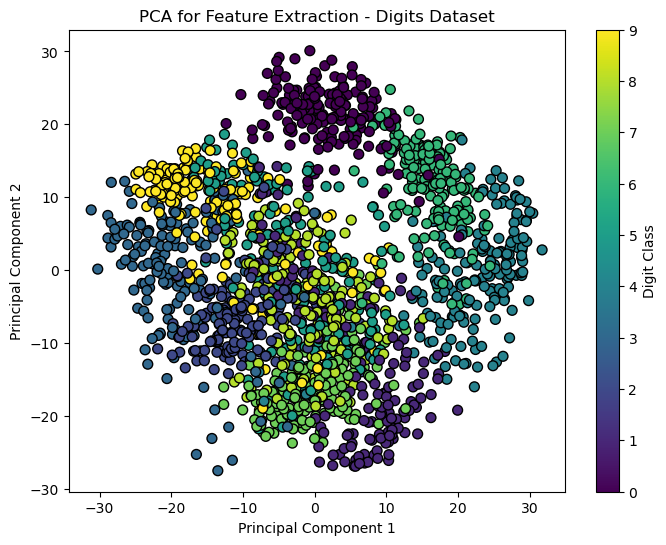

In [4]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Apply PCA for feature extraction (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the reduced-dimensional data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.colorbar(scatter, label='Digit Class', ticks=range(10))
plt.title('PCA for Feature Extraction - Digits Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In this example, PCA is applied to the digits dataset to reduce its dimensionality from 64 features (pixel values) to 2 principal components. The resulting scatter plot shows how the digits are distributed in the reduced feature space. This visualization captures the most significant information in the data while reducing the number of features for further analysis or classification tasks.

### Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.
### Answer : 

In the context of building a recommendation system for a food delivery service, Min-Max scaling can be applied to preprocess the data, specifically when dealing with features like price, rating, and delivery time. Min-Max scaling is a technique that transforms the values of features to a specific range, often [0, 1], making them comparable and preventing features with larger scales from dominating the others.

Here's a step-by-step explanation of how you would use Min-Max scaling for the given dataset:

Understand the Features:

Identify the relevant features in your dataset, such as price, rating, and delivery time.
Check the Range of Each Feature:

Examine the range of values for each feature. For example, prices might be in dollars, ratings could be on a scale from 1 to 5, and delivery time might be in minutes.
Apply Min-Max Scaling:

For each feature, apply the Min-Max scaling formula:
�
scaled
=
�
−
�
min
�
max
−
�
min
X 
scaled
​
 = 
X 
max
​
 −X 
min
​
 
X−X 
min
​
 
​
 
where 
�
X is the original value of the feature, 
�
min
X 
min
​
  is the minimum value of the feature, and 
�
max
X 
max
​
  is the maximum value of the feature.
Transform the Data:

Apply the Min-Max scaling transformation to all relevant features in your dataset. This will ensure that each feature is scaled proportionally within the specified range.
Updated Dataset:

Use the transformed data for building your recommendation system. The scaled features will now have values between 0 and 1, making them more suitable for certain algorithms that are sensitive to the scale of input features.
Here's a Python example using scikit-learn for Min-Max scaling:

In [5]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Sample dataset (replace this with your actual dataset)
data = {
    'price': [10, 20, 15, 25],
    'rating': [4.5, 3.8, 4.2, 4.7],
    'delivery_time': [30, 45, 25, 35]
}

df = pd.DataFrame(data)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the relevant features
scaled_data = scaler.fit_transform(df[['price', 'rating', 'delivery_time']])

# Replace original values with scaled values in the DataFrame
df[['price', 'rating', 'delivery_time']] = scaled_data

# Display the updated DataFrame
print(df)


      price    rating  delivery_time
0  0.000000  0.777778           0.25
1  0.666667  0.000000           1.00
2  0.333333  0.444444           0.00
3  1.000000  1.000000           0.50


In this example, the MinMaxScaler is used to scale the 'price', 'rating', and 'delivery_time' features. The resulting DataFrame contains the scaled values, making them suitable for further analysis and building a recommendation system.

### Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.
### Answer : 

When working on a project to predict stock prices with a dataset containing numerous features, PCA (Principal Component Analysis) can be employed to reduce the dimensionality of the data. The goal is to transform the original features into a smaller set of uncorrelated features, known as principal components, while retaining as much of the variability in the data as possible. This dimensionality reduction can be beneficial for several reasons:

Curse of Dimensionality: A high-dimensional dataset may suffer from the curse of dimensionality, leading to increased computational complexity and potential overfitting. Reducing dimensionality can mitigate these issues.

Correlation Among Features: PCA identifies uncorrelated principal components, which can be particularly useful when dealing with a dataset where some features may be correlated. It simplifies the relationships within the data.

Noise Reduction: By focusing on the principal components that capture the most variance, PCA helps filter out noise and concentrate on the essential information in the data.

Here's a step-by-step explanation of how you might use PCA for dimensionality reduction in the context of predicting stock prices:

Standardize the Data:

Before applying PCA, it's essential to standardize the data by subtracting the mean and scaling to unit variance. This ensures that all features contribute equally to the analysis.
Apply PCA:

Use PCA to decompose the standardized data into principal components. The scikit-learn library in Python provides a convenient implementation for this purpose.
Determine the Number of Components:

Analyze the explained variance ratio to decide how many principal components to retain. The explained variance ratio indicates the proportion of the dataset's variance captured by each principal component.
Project Data onto Principal Components:

Transform the original data into the reduced-dimensional space by projecting it onto the selected principal components.
Use Reduced-Dimensional Data for Modeling:

Utilize the reduced-dimensional data, containing the selected principal components, for training your stock price prediction model.
Here's a simplified example using Python and scikit-learn:

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Sample dataset (replace this with your actual dataset)
# Assume 'stock_data' is a DataFrame containing various financial and market trend features
# Columns: feature_1, feature_2, ..., feature_n
data = np.random.rand(100, 10)  # Generating random data as a placeholder
stock_data = pd.DataFrame(data, columns=[f'feature_{i}' for i in range(1, 11)])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(stock_data)

# Apply PCA
pca = PCA(n_components=0.95)  # Choose the number of components to capture 95% of the variance
reduced_data = pca.fit_transform(scaled_data)

# Display the number of components chosen
print(f"Number of components selected: {pca.n_components_}")

# Use 'reduced_data' for training your stock price prediction model


Number of components selected: 10


### Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.
### Answer : 

To perform Min-Max scaling on a dataset and transform the values to a range of -1 to 1, you can use the following formula:

�
scaled
=
�
−
�
min
�
max
−
�
min
×
(
new_max
−
new_min
)
+
new_min
X 
scaled
​
 = 
X 
max
​
 −X 
min
​
 
X−X 
min
​
 
​
 ×(new_max−new_min)+new_min

Where:

�
scaled
X 
scaled
​
  is the scaled value.
�
X is the original value.
�
min
X 
min
​
  is the minimum value in the original dataset.
�
max
X 
max
​
  is the maximum value in the original dataset.
new_min
new_min and 
new_max
new_max are the desired minimum and maximum values for the scaled range.
For your case, where the desired range is -1 to 1, the formula becomes:

�
scaled
=
�
−
�
min
�
max
−
�
min
×
2
−
1
X 
scaled
​
 = 
X 
max
​
 −X 
min
​
 
X−X 
min
​
 
​
 ×2−1

Let's apply this to the given dataset 
[
1
,
5
,
10
,
15
,
20
]
[1,5,10,15,20]:

In [8]:
import numpy as np

# Given dataset
original_values = np.array([1, 5, 10, 15, 20])

# Min-Max scaling to the range of -1 to 1
new_min, new_max = -1, 1
scaled_values = (original_values - np.min(original_values)) / (np.max(original_values) - np.min(original_values)) * (new_max - new_min) + new_min

print("Original Values:", original_values)
print("Scaled Values (Min-Max scaling to -1 to 1):", scaled_values)


Original Values: [ 1  5 10 15 20]
Scaled Values (Min-Max scaling to -1 to 1): [-1.         -0.57894737 -0.05263158  0.47368421  1.        ]


This will output the scaled values in the range of -1 to 1 based on Min-Max scaling.

### Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?
### Answer : 

The decision of how many principal components to retain in PCA depends on the explained variance ratio and the desired level of information retention. The explained variance ratio indicates the proportion of the total variance in the original data that is captured by each principal component.

Here are the steps to determine the number of principal components to retain:

Standardize the Data:

Before applying PCA, standardize the data to ensure that all features contribute equally.
Apply PCA:

Use PCA to transform the standardized data into principal components.
Analyze Explained Variance:

Examine the explained variance ratio, which is available after fitting the PCA model. It represents the proportion of variance captured by each principal component.
Set a Threshold for Explained Variance:

Choose a threshold for the cumulative explained variance that you consider sufficient. For example, you might aim to retain 95% or 99% of the total variance.
Determine the Number of Components:

Select the number of principal components that achieve the desired cumulative explained variance.
In the context of your dataset with features [height, weight, age, gender, blood pressure], the number of principal components to retain depends on the nature of the data and the importance of capturing variance in the features.

Here's a generic example in Python:

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Sample dataset (replace this with your actual dataset)
data = np.random.rand(100, 5)  # Generating random data as a placeholder
df = pd.DataFrame(data, columns=['height', 'weight', 'age', 'gender', 'blood_pressure'])

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
pca.fit(standardized_data)

# Analyze explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
threshold = 0.95  # Set your desired threshold

# Find the number of components to retain
num_components_to_retain = np.argmax(cumulative_explained_variance >= threshold) + 1

print(f"Number of components to retain for {threshold * 100}% cumulative explained variance: {num_components_to_retain}")


Number of components to retain for 95.0% cumulative explained variance: 5


This example demonstrates how to determine the number of principal components to retain based on a cumulative explained variance threshold. Adjust the threshold according to the level of information retention you find appropriate for your specific case.